# Stephen Lanna
# Assignment 1
# NLP
# 2/6/23

In [186]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import collections

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stephenlanna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephenlanna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [187]:
import sys
print(sys.executable)

/Users/stephenlanna/opt/anaconda3/bin/python


In [188]:
# Read in the xml file to a DataFrame
coffeeDf = pd.read_xml("/Users/stephenlanna/Documents/NLP/Posts_Coffee.xml")
coffeeDf.head()

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastActivityDate,Title,...,CommentCount,FavoriteCount,ContentLicense,LastEditorUserId,LastEditDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName,CommunityOwnedDate
0,1,1,24.0,2015-01-27T20:09:32.720,48,2847.0,"<p>I just got a pound of microroasted, local c...",4.0,2019-02-04T13:15:48.970,How should I store whole bean coffee?,...,4,11.0,CC BY-SA 3.0,NaN,None,NaN,None,None,None,None
1,2,1,22.0,2015-01-27T20:13:58.610,7,1066.0,<p>I manually grind coffee beans for drip coff...,8.0,2015-01-27T21:13:20.537,How fine should I grind coffee for drip/pour o...,...,4,NaN,CC BY-SA 3.0,8.0,2015-01-27T21:13:20.537,NaN,None,None,None,None
2,3,1,15.0,2015-01-27T20:20:05.700,30,1614.0,<p>I live in a hard water area and when brewin...,8.0,2019-11-28T09:51:33.867,Does the hardness of water matter when making ...,...,1,NaN,CC BY-SA 3.0,262.0,2016-05-02T01:36:46.847,NaN,None,None,None,None
3,4,1,37.0,2015-01-27T20:30:33.657,10,302.0,"<p>I own a drip coffee pot:\n<img src=""https:/...",8.0,2015-01-27T21:58:54.353,What's the theory behind using thin spouted ke...,...,8,1.0,CC BY-SA 3.0,8.0,2015-01-27T21:26:01.250,NaN,None,None,None,None
4,5,1,8.0,2015-01-27T20:34:58.077,20,1212.0,<p>I observe that coffee servers (I refuse to ...,8.0,2022-02-24T19:13:05.100,How important is tamping coffee for an espress...,...,0,NaN,CC BY-SA 3.0,8.0,2015-01-27T20:46:23.583,NaN,None,None,None,None


In [189]:
coffeeDf.isna().sum()

Id                          0
PostTypeId                  0
AcceptedAnswerId         3562
CreationDate                0
Score                       0
ViewCount                2843
Body                       36
OwnerUserId                62
LastActivityDate            0
Title                    2843
Tags                     2843
AnswerCount              2843
CommentCount                0
FavoriteCount            3862
ContentLicense              0
LastEditorUserId         2561
LastEditDate             2542
ParentId                 1511
ClosedDate               4150
OwnerDisplayName         4113
LastEditorDisplayName    4187
CommunityOwnedDate       4206
dtype: int64

# Part 1: Preprocessing/Zipf's Law Plot

In [190]:
# Function to remove rows that have null values for 'Title' column
def removeNullTitles(df):
    df = df[df['Title'].notna()]
    return df

In [191]:
# Function to get a list of words from the dataframe
def dfToWords(df):
    # Drop rows that have null Titles
    df = removeNullTitles(df)
    
    words = []
    # Iterate through dataframe, adding words to the list
    for index, row in df.iterrows():
        rowList = re.split('[^a-zA-Z]', row['Title'].lower())
        for word in rowList:
            if len(word) > 0:
                words.append(word)
    return words

In [192]:
# Call functions to get a cleaned list of words
words = dfToWords(coffeeDf)

In [193]:
# Function to get most frequent words. Takes a list of words and int representing n many tuples to return. 
def getMostFrequentWords(words, top):
    counterWords = collections.Counter(words)
    topWordFrequencies = counterWords.most_common(top)
    
    return topWordFrequencies

In [194]:
def createZipfTable(frequencies):
    zipfTable = []
    topFrequency = frequencies[0][1]
    
    for index, item in enumerate(frequencies, start=1):
        
        relativeFrequency = "1/{}".format(index)
        zipfFrequency = topFrequency * (1 / index)
        differenceActual = item[1] - zipfFrequency
        differencePercent = (item[1] / zipfFrequency) * 100

        zipfTable.append({"word": item[0],
                           "actualFrequency": item[1],
                           "relativeFrequency": relativeFrequency,
                           "zipfFrequency": zipfFrequency,
                           "differenceActual": differenceActual,
                           "differencePercent": differencePercent})

    return zipfTable

In [195]:
def printZipfTable(zipfTable):

    """
    Prints the list created by generate_zipf_table
    in table format with column headings.
    """

    width = 80

    print("-" * width)
    print("|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|")
    print("-" * width)

    formatString = "|{:4}|{:12}|{:12.0f}|{:>12}|{:12.2f}|{:12.2f}|{:7.2f}%|"

    for index, item in enumerate(zipfTable, start=1):

        print(formatString.format(index,
                                   item["word"],
                                   item["actualFrequency"],
                                   item["relativeFrequency"],
                                   item["zipfFrequency"],
                                   item["differenceActual"],
                                   item["differencePercent"]))

    print("-" * width)

In [196]:
def genZipfTable(df, top):
    #words = dfToWords(df)
    topWordFreq = getMostFrequentWords(words, top)
    zipfTable = createZipfTable(topWordFreq)
    return zipfTable

In [197]:
zipfTable = genZipfTable(words, 15)
printZipfTable(zipfTable)

--------------------------------------------------------------------------------
|Rank|    Word    |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
--------------------------------------------------------------------------------
|   1|coffee      |         771|         1/1|      771.00|        0.00| 100.00%|
|   2|the         |         415|         1/2|      385.50|       29.50| 107.65%|
|   3|to          |         339|         1/3|      257.00|       82.00| 131.91%|
|   4|a           |         324|         1/4|      192.75|      131.25| 168.09%|
|   5|is          |         293|         1/5|      154.20|      138.80| 190.01%|
|   6|how         |         276|         1/6|      128.50|      147.50| 214.79%|
|   7|what        |         270|         1/7|      110.14|      159.86| 245.14%|
|   8|of          |         254|         1/8|       96.38|      157.62| 263.55%|
|   9|i           |         212|         1/9|       85.67|      126.33| 247.47%|
|  10|in          |         

### Explain in a paragraph

These results are not exactly what I would expect from Zipf's law. In certain situations it is, while others it is not. For example, "coffee" occurs about twice as frequently as "the." The third most frequent word, "to," does not occur exactly 1/3 as frequently as "coffee," but it is close. However, the 4th most frequent word ("a") occurs closer to 1/2 as frequent as word 1, not 1/4. This is not close enough to pass in my opinion.

# Part 2: WordClouds

### Word Cloud (with stopwords)

In [198]:
freqWords = getMostFrequentWords(words, 20)

top20 = ""

for i in freqWords:
    top20 += i[0] + " "

word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords="").generate(top20)

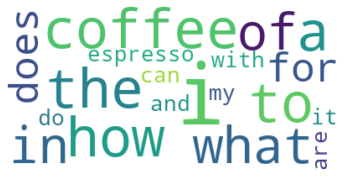

In [199]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud (stopwords removed)

In [200]:
allWords = ""

for word in words:
    allWords += word + " "
    
stopWords = set(stopwords.words('english'))

wordTokens = word_tokenize(allWords)

stopwordsRemoved = [w for w in wordTokens if not w.lower() in stopWords]

stopwordsRemoved = []

for w in wordTokens:
    if w not in stopWords:
        stopwordsRemoved.append(w)

In [201]:
freqWords = getMostFrequentWords(stopwordsRemoved, 20)

top20 = ""

for i in freqWords:
    top20 += i[0] + " "

word_cloud = WordCloud(collocations = False, background_color = 'white', stopwords="").generate(top20)

In [202]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(top20)

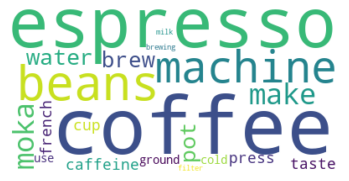

In [203]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### WordCloud Analysis

The first WordCloud contains mostly stopwords, except for the words "coffee" and "espresso." The second WordCloud contains exclusively coffee related words, which is pretty cool. It shows just how often stopwords are used. I foresee stopword processing to be an important thing to handle in my project.

# Part 3

I would first find datasets that have different speeches/quotes from presidents. Then I would clean/normalize the data. Then, I would use a Byte-Pair Encoder or a WordPiece tokenizer to build our vocabulary and calculate word/character pair probabilities. Depending on the size of the dataset we are working with, I would probably select an n-gram model to generate a speech, to fine tune a realistic speech. Next, I would split the data into X and y datasets, and split the X and y sets into train/test sets. I would train the n-gram model on the training sets, and use the test sets to validate the model.

# Part 4

A BPE, or Byte-Pair Encoding tokenizer, works by computing the unique set of words used in a corpus, after normalization/pre-tokenization steps are completeed. After this, a BPE builds the vocabulary by taking all the symbols used to write those words, thus building our alphabet. Beyond this, new tokens will be added to the base vocabulary until the desired vocabulary size is reached.

WordPiece was developed by Google to pretrain BERT. WordPiece works similarly to BPE, starting wiht a small vocabulary including special tokens used by the model/alphabet. WordPiece identifies subwords by adding prefixes, thus each word is split by adding the prefix to all characters inside the word. So, the alphabet is made up of all the characters present at the beginning of a word, and characters present inside a word preceded by the prefix.

low low low low low lowest lowest newer newer newer newer newer newer wider wider wider
new new

WordPiece will tokenize this sample of text by first getting the list of unique words. This list will contain [low, lowest, newer, wider, new]. Then, we will get a count for each of them, which will be:

low: 5
lowest: 2
newer: 6
wider: 3
new: 2

Lastly, we will get the list of all unique chars to construct our vocabulary. These unique chars will be [l, o, w, e, s, t, n, r, i]. We will then pick a consecutive pair that has the highest joint probability, in this case will be w and e. The probability will be computed as:

P(w,e) = 16/(18*19) = 0.0468

This pair will then be added back to our vocabulary set, which will now be [l, o, w, e, s, t, n, r, i, we]. This process will be repeated until we've reached our defined vocabulary size.